<a href="https://colab.research.google.com/github/thornwishstalon/psychic-spoon/blob/main/dopp32_ex3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DOPP 32



In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import os
import re
import seaborn as sns


In [2]:
#to map iso2 country codes to iso3 - not sure if we need this helper function at all- remains to be ssen
!pip install pycountry
import pycountry as pc

def changeIso2ToIso3(code):
    country = None
    try:
        country = pc.countries.get(alpha_2=code)
        if country is None:
            return None
        return country.alpha_3
    except LookupError:
        return None

# use like this: df['country code'] = df['country_code'].apply(lambda code: changeIso2ToIso3(code))     

     |████████████████████████████████| 10.1MB 4.9MB/s 
  Created wheel for pycountry: filename=pycountry-20.7.3-py2.py3-none-any.whl size=10746863 sha256=33aface3118841b5afce68dcb33f1473c85c509ff3a38cdfc9883103d819659b
  Stored in directory: /root/.cache/pip/wheels/33/4e/a6/be297e6b83567e537bed9df4a93f8590ec01c1acfbcd405348
Successfully built pycountry


In [16]:
try:
    from google.colab import drive
    drive.mount("/content/drive/", force_remount=True)
    google_drive_prefix = "/content/drive/My Drive/dopp32_ex3_data"
    data_prefix = "{}/".format(google_drive_prefix)
except ModuleNotFoundError: 
    data_prefix = "data/"

print(data_prefix)

Mounted at /content/drive/
/content/drive/My Drive/dopp32_ex3_data/


In [33]:
#HELPER   ###################################
def create_year_dict(range, type, postfix=None):
    year_dict = {}
    for i in range:
      key = str(i)
      if postfix is not None:
        key = str(i) + postfix.format(i)

      year_dict[key] =type

    return year_dict

def load_country_list():
    country_file_name = "WDICountry_whitelist.csv"
    df = pd.read_csv(data_prefix + country_file_name, index_col=0)
    
    return df.index.to_numpy()


def load_WDI():
    '''
    loads WDI data csv file
    :return: pd.DataFrame
    '''
    WDI_data_file_name = "WDIData.csv"
    df = pd.read_csv(data_prefix + WDI_data_file_name, dtype=create_year_dict(range(1960, 2020), np.float))
    df.drop(df.columns[df.columns.str.contains('unnamed', case=False)], axis=1, inplace=True)

    df = df[df['Country Code'].isin(load_country_list())]

    return df

def load_WDI_Partials():
  sub_folder = 'data_csv/'
  directory = data_prefix+ sub_folder
  dfs = []
  for filename in os.listdir(directory):
    
    if filename.endswith(".csv"):
      print(filename)
      # print(data_prefix + sub_folder + filename)

      df = pd.read_csv(data_prefix + sub_folder + filename, header=2,skip_blank_lines=True,)
      #df.columns = name_cols      
      dfs.append(df)

  return pd.concat(dfs)


def select_indicators(df, indicator_list):
  return df[df['Indicator Code'].isin(indicator_list)]

def get_name_replacements(columns=None):
  columns_replacements = columns.copy()
  d_types = {}
  if columns is None:
    columns = []
    columns_replacements = []
  for i in range(1980, 2021):
    columns.append("{} [YR{}]".format(i,i))
    columns_replacements.append(str(i))
    d_types["{} [YR{}]".format(i,i)]= 'float64'
  return columns , columns_replacements, d_types

def get_year_columns():
    columns = []
    for i in range(1980, 2021):      
      columns.append(str(i))

    return columns

def strip(year):
  p = re.compile('\[.+\]')
  year= p.sub('', year)
  return str.trim(year)

def turn_wide_into_long(wdi_data, id_vars, index ):
  wdi_data = pd.melt(wdi_data, id_vars=id_vars,
                   value_vars=get_year_columns(), var_name="Year", 
          value_name="Value")
  wdi_data[["Value", "Year"]] = wdi_data[["Value", "Year"]].apply(pd.to_numeric)  
  #wdi_data.set_index(index,inplace=True)
  
  return wdi_data  




#HELPER   ###################################
#END      ###################################

load all the data... from /data subfolder


In [37]:
# load all csv files from /data subfolder
wdi_data = load_WDI_Partials()

wdi_data = turn_wide_into_long(wdi_data,['Country Code','Indicator Code'],['Country Code','Indicator Code','Year'])
#print(wdi_data_partial.head(25))
print(wdi_data['Indicator Code'].unique())



API_SE.SEC.ENRL.TC.ZS_DS2_en_csv_v2_1928645.csv
API_SE.PRM.ENRL.TC.ZS_DS2_en_csv_v2_1931586.csv
API_SE.PRE.ENRL.TC.ZS_DS2_en_csv_v2_1928540.csv
API_NY.GNP.PCAP.CN_DS2_en_csv_v2_1928445.csv
API_NY.GNP.PCAP.CD_DS2_en_csv_v2_1928444.csv
API_IP.PAT.RESD_DS2_en_csv_v2_1926725.csv
API_NE.CON.TOTL.ZS_DS2_en_csv_v2_1928249.csv
API_IT.NET.USER.ZS_DS2_en_csv_v2_1928189.csv
API_IP.PAT.NRES_DS2_en_csv_v2_1928118.csv
API_IC.TAX.PRFT.CP.ZS_DS2_en_csv_v2_1928097.csv
API_IP.JRN.ARTC.SC_DS2_en_csv_v2_1928117.csv
API_IC.REG.PROC_DS2_en_csv_v2_1928085.csv
API_IC.REG.DURS_DS2_en_csv_v2_1928081.csv
API_IC.REG.COST.PC.ZS_DS2_en_csv_v2_1928079.csv
API_IC.ISV.DURS_DS2_en_csv_v2_1928069.csv
API_IC.BUS.NDNS.ZS_DS2_en_csv_v2_1928015.csv
API_HD.HCI.OVRL_DS63_en_csv_v2_1935059.csv
API_EN.ATM.CO2E.PC_DS2_en_csv_v2_1927797.csv
API_GB.XPD.RSDV.GD.ZS_DS2_en_csv_v2_1926772.csv
API_IC.BUS.DFRN.XQ_DS2_en_csv_v2_1928011.csv
API_FR.INR.RINR_DS2_en_csv_v2_1926693.csv
API_CM.MKT.LCAP.GD.ZS_DS2_en_csv_v2_1926638.csv
API_BX.KL

booya

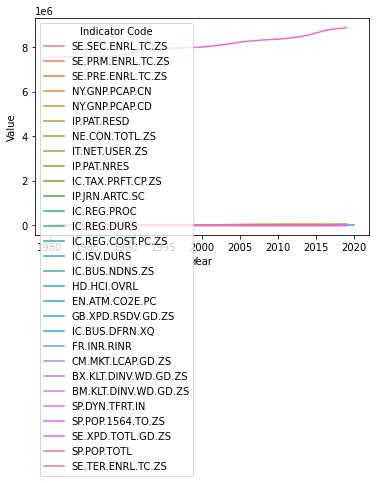

In [35]:
# get Scientific and technical journal articles data
tmp = wdi_data.loc[wdi_data['Country Code'] == 'AUT']

sns.lineplot(x="Year", y="Value",hue="Indicator Code",data=tmp)

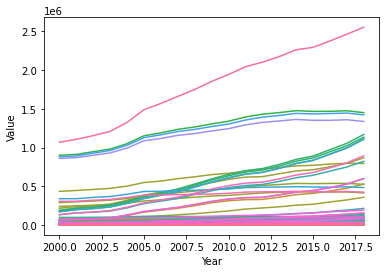

In [38]:
# get Scientific and technical journal articles data
#tmp = wdi_data.loc[wdi_data['Indicator Code'] == 'IP.JRN.ARTC.SC']
tmp = wdi_data.loc[wdi_data['Indicator Code'] == 'IP.JRN.ARTC.SC']

sns.lineplot(x="Year", y="Value",hue="Country Code",data=tmp, legend=None)